         V1        V2        V3        V4        V5        V6        V7  \
0 -6.677212  5.529299 -7.193275  6.081321 -1.636071  0.500610 -4.640770   
1  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
2 -4.446847 -0.014793 -5.126307  6.945130  5.269255 -4.297177 -2.591242   
3 -1.309441  1.786495 -1.371070  1.214335 -0.336642 -1.390120 -1.709109   
4  0.206075  1.387360 -1.045287  4.228686 -1.647549 -0.180897 -2.943678   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0 -4.339840 -0.950036  0.566680  ...  5.563301 -1.608272  0.965322  0.163718   
1  0.248525 -1.127396 -3.232153  ...  0.370612  0.028234 -0.145640 -0.081049   
2  0.342671 -3.880663 -3.976525  ...  0.247913 -0.049586 -0.226017 -0.401236   
3  0.667748 -1.699809 -3.843911  ...  0.533521 -0.022180 -0.299556 -0.226416   
4  0.859156 -1.181743 -3.096504  ...  0.469199  0.344930 -0.203799  0.376640   

        V25       V26       V27       V28  Amount  Class  
0  0.0475

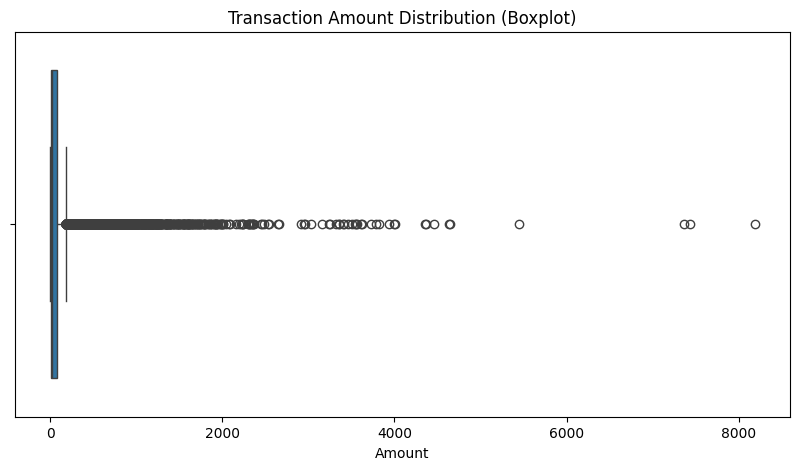

In [6]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../raw_data/ML_creditcard_fraud.csv")

print(df.head())
print(df.shape)

# Define the features
selected_features = ['Amount'] + [f'V{i}' for i in range(1, 29)]
#Define the target
target = 'Class'

# Check for duplicates
duplicate_count = df.duplicated().sum()
print("Duplicates:", duplicate_count)

# Remove duplicates
df = df.drop_duplicates()

#no missing values

# Prepare X and y
X = df[selected_features]
y = df[target]

# Scaling
# Use Robot Scaler, common in credit fraud data, uses median for centering and IQR for scaling
# Train/test split (with stratification because of imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale (fit only on train)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Visualize the data to check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Amount'])
plt.title("Transaction Amount Distribution (Boxplot)")
plt.xlabel("Amount")
plt.show()
